In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis.gensim
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import scipy
pd.set_option("display.max_colwidth", 200)

In [267]:
prices = pd.read_csv('TSLA.csv')

In [268]:
prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-11,34.599998,35.500000,34.459999,35.279999,35.279999,1572600
1,2012-12-12,35.209999,35.799999,34.950001,35.259998,35.259998,2063800
2,2012-12-13,35.259998,35.299999,32.750000,33.610001,33.610001,2151300
3,2012-12-14,33.779999,34.400002,33.590000,33.810001,33.810001,1023000
4,2012-12-17,33.770000,34.500000,33.750000,34.400002,34.400002,824900


In [269]:
prices['Year_num'] = prices['Date'].apply(lambda x: float(x[:4]))
prices['Month'] = prices['Date'].apply(lambda x: int(x[5:7])-1)
prices['Year'] = prices['Year_num'] + (prices['Month']//2)/float(6.0)

In [270]:
prices = prices[['Year', 'Volume', 'Close']]

In [271]:
prices.head()

,Year,Volume,Close
0,2012.833333,1572600,35.279999
1,2012.833333,2063800,35.259998
2,2012.833333,2151300,33.610001
3,2012.833333,1023000,33.810001
4,2012.833333,824900,34.400002


In [272]:
prices = prices.groupby('Year').mean()

In [273]:
prices

,Volume,Close
Year,,
2012.833333,1.103514e+06,34.188571
2013.000000,1.818015e+06,36.223000
2013.166667,2.647693e+06,41.858095
2013.333333,1.215085e+07,90.485476
2013.500000,1.110897e+07,136.780908
2013.666667,9.992219e+06,174.354883
2013.833333,1.234211e+07,141.125365
2014.000000,1.024716e+07,183.988250
2014.166667,7.902224e+06,220.717143


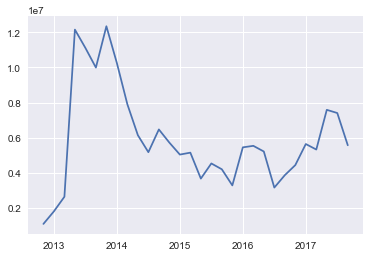

In [274]:
plt.plot(prices['Volume'])

In [275]:
df = pd.read_csv('data_elonmusk.csv',encoding = "ISO-8859-1")

In [276]:
number_of_topics = 4

In [277]:
#fix nans
documents = []
for row in range(df.shape[0]):
    for col in range(1,2):
        if type(df.iloc[row,col])!=str:
            print(df.iloc[row,col])
            documents.append(" ")
        else:
            documents.append(df.iloc[row,col])
len(documents)

3218

In [278]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")


# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['headline_text'] = news_df['clean_doc'].apply(lambda x: x.lower())
news_df["index"] = [i for i in range(len(documents))]
del news_df['document']
del news_df['clean_doc']
documents = news_df

In [279]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import PorterStemmer
#from nltk.stem.porter import stemmer
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Angelos
[nltk_data]     Pele\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [280]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and token != "http" and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [281]:
doc_sample = documents[documents['index'] == 3000].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['heart', 'goes', 'people', 'central', 'texas', 'home', 'spacex', 'resources', 'disposal', 'help']


 tokenized and lemmatized document: 
['heart', 'go', 'peopl', 'central', 'texa', 'home', 'spacex', 'resourc', 'dispos', 'help']


In [282]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0                    [meltingic, assum, acceler, comfort, direct, feel, like, mild, moder, http, fpjmegrhfc]
1          [spacex, capabl, transport, satellit, orbit, crew, cargo, space, station, complet, mission, moon]
2                                                                                                   [bigajm]
3                                                                                               [http, muhm]
4                                                          [place, earth, min, cost, seat, http, dgyddgttyd]
5    [spacex, support, creation, perman, self, sustain, human, presenc, mar, http, kctblpbsg, http, hksrocg]
6                                                                                         [earth, min, http]
7                                       [mar, citi, opposit, earth, dawn, dusk, blue, mar, http, xhczidgqnb]
8                                                                                  [moon, base, alpha, http]
9                  

In [283]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 acceler
1 assum
2 comfort
3 direct
4 feel
5 fpjmegrhfc
6 http
7 like
8 meltingic
9 mild
10 moder


In [284]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)

In [285]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[3000]

[(11, 1), (53, 1), (111, 1), (226, 1), (250, 1)]

In [286]:
bow_doc_4310 = bow_corpus[3000]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 11 ("spacex") appears 1 time.
Word 53 ("peopl") appears 1 time.
Word 111 ("go") appears 1 time.
Word 226 ("help") appears 1 time.
Word 250 ("home") appears 1 time.


In [287]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.6499763511911087),
 (1, 0.6355424810709098),
 (2, 0.16739723298333667),
 (3, 0.38156868849008985)]


In [288]:
corpus_tfidf

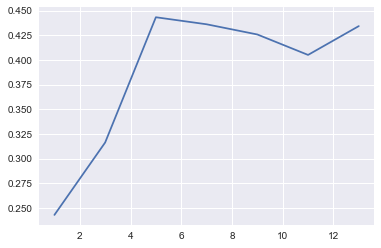

In [289]:
x = []
y = []
for i in range(1, 15, 2):
    lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=i, id2word=dictionary, passes=2, alpha='auto', eta=50./i)
    cm = CoherenceModel(model=lda_model, texts=processed_docs, coherence='c_v')
    coherence = cm.get_coherence()  # get coherence value
    x.append(i)
    y.append(coherence)
plt.plot(x, y)

In [290]:
lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=number_of_topics, id2word=dictionary, passes=2, alpha='auto', eta=50./number_of_topics)

In [291]:
import pyLDAvis.gensim
hello = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(hello)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [292]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"spacex" + 0.012*"thank" + 0.011*"launch" + 0.011*"falcon" + 0.011*"land" + 0.008*"rocket" + 0.008*"http" + 0.008*"year" + 0.008*"great" + 0.007*"time"
Topic: 1 
Words: 0.011*"like" + 0.010*"space" + 0.009*"rocket" + 0.008*"launch" + 0.008*"probabl" + 0.008*"station" + 0.008*"dragon" + 0.007*"nasa" + 0.007*"spacex" + 0.007*"flight"
Topic: 2 
Words: 0.020*"tesla" + 0.020*"http" + 0.017*"model" + 0.015*"teslamotor" + 0.011*"elonmusk" + 0.008*"drive" + 0.008*"work" + 0.008*"car" + 0.007*"exactli" + 0.006*"mile"
Topic: 3 
Words: 0.012*"good" + 0.008*"love" + 0.008*"best" + 0.007*"chang" + 0.007*"true" + 0.007*"world" + 0.006*"definit" + 0.006*"softwar" + 0.006*"sure" + 0.006*"climat"


In [326]:
for idx, topic in lda_model.print_topics(-1):
    spl = topic.split('+')
    tseo= []
    for spl_element in spl:
        tseo = tseo + spl_element.split('*')
    new_tseo = [tseo[i][1:-2] for i in range(1, 20, 2)]
    mega_tseo = ' '.join(new_tseo)
    print('Topic# {}: {}'.format(idx, mega_tseo))

Topic# 0: spacex thank launch falcon land rocket http year great tim
Topic# 1: like space rocket launch probabl station dragon nasa spacex fligh
Topic# 2: tesla http model teslamotor elonmusk drive work car exactli mil
Topic# 3: good love best chang true world definit softwar sure clima


In [328]:
#number of documents
lda_model[bow_corpus[354]]
processed_docs.shape

(3218,)

In [346]:
result = pd.concat([df, processed_docs], axis=1)

In [347]:
result['Year'] = result['Time'].apply(lambda x: float(x[:4]) + float((int(x[5:7])-1)//2)/6.0)

In [348]:
n = processed_docs.shape[0]
pred = []
for j in range(number_of_topics):
    pred.append([])
for i in range(n):
    for j in range(number_of_topics):
        if len(lda_model[bow_corpus[i]]) <= j:
            pred[j].append(0.0)
        else:
            pred[j].append(lda_model[bow_corpus[i]][j][1])
for j in range(number_of_topics):
    pred[j] = pd.Series(pred[j])

In [349]:
result.head()

,row ID,Tweet,Time,Retweet from,User,headline_text,Year
0,Row0,"@MeltingIce Assuming max acceleration of 2 to 3 g's, but in a comfortable direction. Will feel like a mild to moder? https://t.co/fpjmEgrHfC",2017-09-29 17:39:19,NaN,elonmusk,"[meltingic, assum, acceler, comfort, direct, feel, like, mild, moder, http, fpjmegrhfc]",2017.666667
1,Row1,"RT @SpaceX: BFR is capable of transporting satellites to orbit, crew and cargo to the @Space_Station and completing missions to the Moon an?",2017-09-29 10:44:54,SpaceX,elonmusk,"[spacex, capabl, transport, satellit, orbit, crew, cargo, space, station, complet, mission, moon]",2017.666667
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk,[bigajm],2017.666667
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk,"[http, muhm]",2017.666667
4,Row4,Fly to most places on Earth in under 30 mins and anywhere in under 60. Cost per seat should be? https://t.co/dGYDdGttYd,2017-09-29 09:19:21,NaN,elonmusk,"[place, earth, min, cost, seat, http, dgyddgttyd]",2017.666667


In [350]:
result = pd.concat([result]+pred, axis=1)

In [351]:
results = result.groupby(['Year']).sum()

In [352]:
results.head()

,0,1,2,3
Year,,,,
2012.833333,16.710491,10.848189,18.553977,8.661113
2013.000000,12.194172,4.599783,29.515904,4.627602
2013.166667,40.305011,29.506685,53.299286,15.526865
2013.333333,42.094041,18.449875,70.155364,28.383042
2013.500000,14.019249,4.291848,10.319526,5.370737


Text(0,0.5,'Relevance of topic')

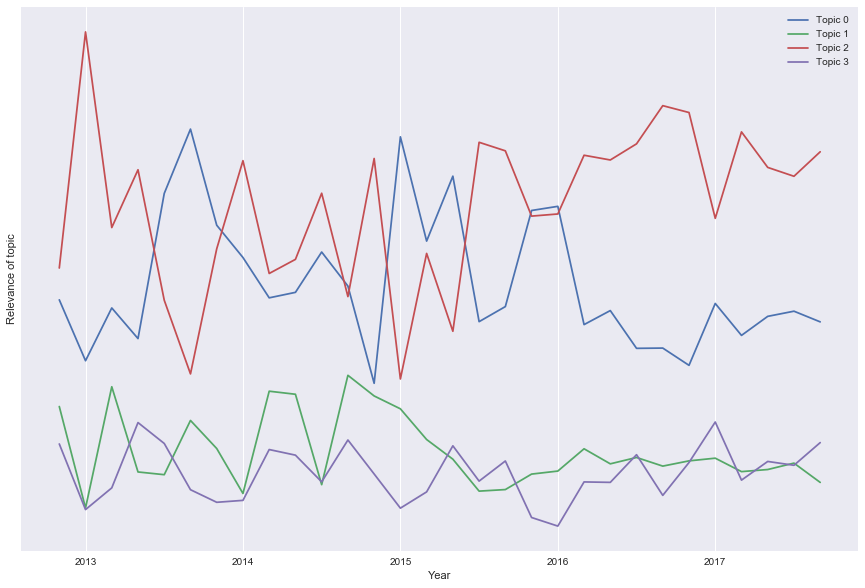

In [345]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(results)
plt.legend(["Topic "+str(i) for i in range(number_of_topics)])
plt.yticks([])
plt.xlabel('Year')
plt.ylabel('Relevance of topic')

In [299]:
sns.set()

<Figure size 1440x720 with 0 Axes>

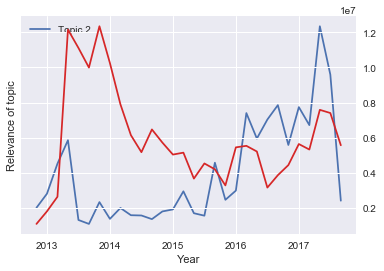

In [314]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))

fig, ax1 = plt.subplots()

ax1.plot(results[2])
ax1.legend(["Topic 2"])
ax1.set_xlabel('Year')
ax1.set_yticks([])
ax1.set_ylabel('Relevance of topic')

ax2 = ax1.twinx()
ax2.plot(prices['Volume'], color = 'tab:red')

In [315]:
scipy.stats.pearsonr(prices['Volume'], results[2])

(-0.05621481414974923, 0.7679546636391394)

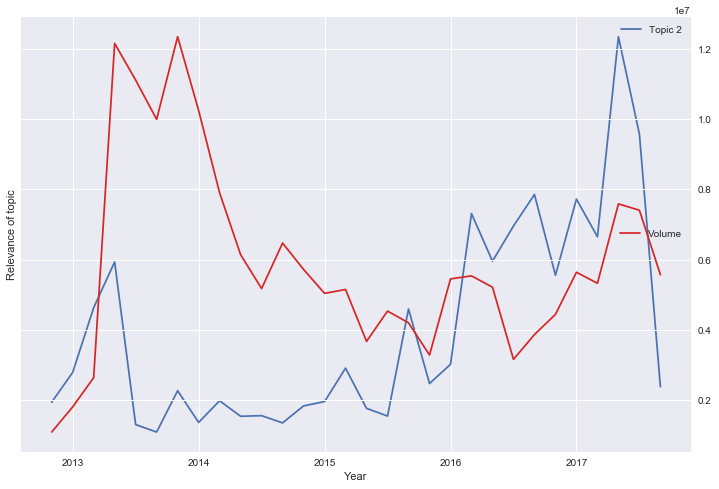

In [353]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(results[2], label='big')
ax1.legend(["Topic 2"], loc="upper right")
ax1.set_xlabel('Year')
ax1.set_yticks([])
ax1.set_ylabel('Relevance of topic')

ax2 = ax1.twinx()
ax2.plot(prices['Volume'], color = 'tab:red', label='big')
ax2.legend(["Volume"], loc="center right")

# plt.legend(["Topic 2", "Close value"], loc="best")

In [354]:
scipy.stats.pearsonr(prices['Volume'], results[2])

(-0.05594376339600408, 0.7690433665652908)

<Figure size 1440x720 with 0 Axes>

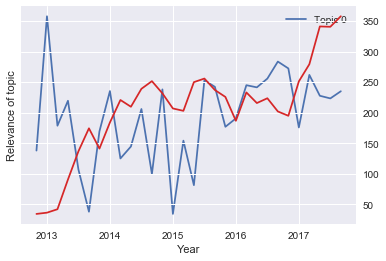

In [304]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))

fig, ax1 = plt.subplots()

ax1.plot(results[2])
ax1.legend(["Topic "+str(i) for i in range(1)])
ax1.set_xlabel('Year')
ax1.set_yticks([])
ax1.set_ylabel('Relevance of topic')

ax2 = ax1.twinx()
ax2.plot(prices['Close'], color = 'tab:red')

<Figure size 1440x720 with 0 Axes>

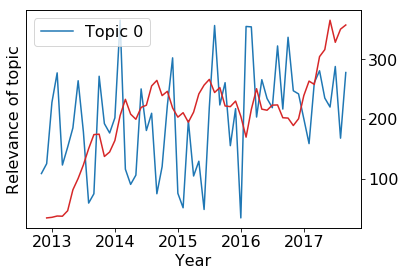

In [226]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(20,10))

fig, ax1 = plt.subplots()

ax1.plot(results[2])
ax1.legend(["Topic "+str(i) for i in range(1)])
ax1.set_xlabel('Year')
ax1.set_yticks([])
ax1.set_ylabel('Relevance of topic')

ax2 = ax1.twinx()
ax2.plot(prices['Close'], color = 'tab:red')

In [26]:
processed_docs

0                       [meltingic, assum, acceler, comfort, direct, feel, like, mild, moder, http, fpjmegrhfc]
1             [spacex, capabl, transport, satellit, orbit, crew, cargo, space, station, complet, mission, moon]
2                                                                                                      [bigajm]
3                                                                                                  [http, muhm]
4                                                             [place, earth, min, cost, seat, http, dgyddgttyd]
5       [spacex, support, creation, perman, self, sustain, human, presenc, mar, http, kctblpbsg, http, hksrocg]
6                                                                                            [earth, min, http]
7                                          [mar, citi, opposit, earth, dawn, dusk, blue, mar, http, xhczidgqnb]
8                                                                                     [moon, base, alpha

In [27]:
lda_model

In [28]:
bow_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [],
 [(2, 1)],
 [(2, 1), (13, 1), (14, 1), (15, 1), (16, 1)],
 [(2, 2), (11, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(2, 1), (14, 1), (15, 1)],
 [(2, 1), (14, 1), (18, 2)],
 [(2, 1), (7, 1)],
 [(2, 1), (21, 1), (22, 1), (23, 1)],
 [(2, 1),
  (8, 1),
  (11, 1),
  (14, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [],
 [(28, 1)],
 [(2, 1)],
 [(13, 1), (29, 1), (30, 1), (31, 1)],
 [(1, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)],
 [],
 [(2, 1), (27, 1), (38, 1), (39, 1)],
 [],
 [(2, 1), (11, 1), (26, 1), (32, 1), (40, 1), (41, 1)],
 [(39, 1)],
 [(42, 1), (43, 1)],
 [(2, 1), (11, 1), (26, 1), (32, 1), (40, 1)],
 [(3, 1), (44, 1)],
 [(2, 1), (45, 1), (46, 1)],
 [(39, 1), (47, 1), (48, 1), (49, 1), (50, 1)],
 [(29, 1), (51, 1)],
 [],
 [(2, 1), (52, 1), (53, 1), (54, 1), (55, 1)],
 [(2, 1), (56, 1), (57, 1)],
 [(54, 1), (58, 1)],
 [(59, 1)],
 [(2, 1

In [40]:
#Now let's average out those scores over the surrounding 1000 articles scores to see how average scores change over time
n = processed_docs.shape[0]
averages = []
i=0
start = 2012
end = 2017
dates = []
while(i<n):
    array = np.zeros((10,1))
    k=0
    pred = lda_model[bow_corpus[i]]
    for j in range(10):
        if j in [tup[0] for tup in pred]:
            array[j,:] = pred[k][1]
            k+=1
            
    running_sum = array
    print(array)
    break
    i+=1
    count = 0
    while (i)%500 != 0 and i<n:
        #print(i)
        array = np.zeros((10,1))
        k=0
        pred = lda_model[bow_corpus[i]]
        for j in range(10):
            if j in [tup[0] for tup in pred]:
                try:
                    array[j,:] = pred[k][1]
                    k+=1
                except:
                    print(i,array,j,k,pred)

        running_sum = running_sum + array
        i+=1
        count+=1
    averages.append(running_sum/count)
    dates.append(start + (end-start)*i/n)

[[0.02000602]
 [0.020004  ]
 [0.02000205]
 [0.02000689]
 [0.02000181]
 [0.81996679]
 [0.02000128]
 [0.0200017 ]
 [0.02000455]
 [0.02000487]]


In [23]:
averages = np.hstack(average for average in averages)
averages.shape

(10, 7)

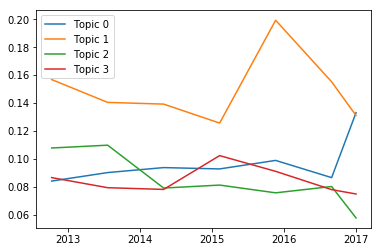

In [24]:
import matplotlib.pyplot as plt
plt.plot(dates,averages[:4,:].T)
plt.legend(["Topic "+str(i) for i in range(averages.shape[0])])